# Backpropagation
```
----------------------------------------------------------------------
Filename : 04_backpropagation.ipynb
Date     : 16th March, 2017
Author   : Jaidev Deshpande
Purpose  : Training multilayer perceptrons with error backpropagation.
Libraries: Theano and its dependencies
----------------------------------------------------------------------
```

In [ ]:
from IPython.display import Image
Image("mlp.png", height=200, width=600)

# Variables & Terminology
* ## $W_{i}$ - weights of the $i$th layer
* ## $B_{i}$ - biases of the $i$th layer
* ## $L_{a}^{i}$ - _activation_ (Inner product of weights and inputs of previous layer) of the $i$th layer.
* ## $L_{o}^{i}$ - _output_ of the $i$th layer. (This is $f(L_{a}^{i})$, where $f$ is the activation function)

# MLP with one input, one hidden, one output layer
* ## $X, y$ are the training samples
* ## $\mathbf{W_{1}}$ and $\mathbf{W_{2}}$ are the weights for first (hidden) and the second (output) layer.
* ## $\mathbf{B_{1}}$ and $\mathbf{B_{2}}$ are the biases for first (hidden) and the second (output) layer.
* ## $L_{a}^{0} = L_{o}^{0}$, since the first (zeroth) layers is just the input.

# Activations and outputs
* ## $L_{a}^{1} = X\mathbf{W_{1}} + \mathbf{B_{1}}$
* ## $L_{o}^{1} = \frac{1}{1 + e^{-L_{a}^{1}}}$
* ## $L_{a}^{2} = L_{o}^{1}\mathbf{W_{2}} + \mathbf{B_{2}}$
* ## $L_{o}^{2} = \frac{1}{1 + e^{-L_{a}^{2}}}$
* ## Loss $E = \frac{1}{2} \sum_{S}(y - L_{o}^{2})^{2}$

----
Derivation of backpropagation learning rule:

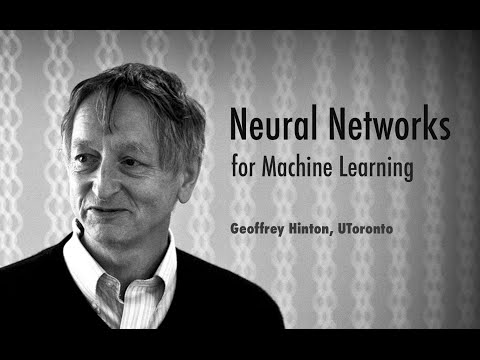

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("LOc_y67AzCA")

In [ ]:
import numpy as np
from utils import backprop_decision_boundary, backprop_make_classification, backprop_make_moons
from sklearn.metrics import accuracy_score
from theano import tensor as T
from theano import function, shared
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('figure', figsize=(8, 6))
%matplotlib inline

In [ ]:
x, y = T.dmatrices('xy')

# weights and biases
w1 = shared(np.random.rand(2, 3), name="w1")
b1 = shared(np.random.rand(1, 3), name="b1")
w2 = shared(np.random.rand(3, 2), name="w2")
b2 = shared(np.random.rand(1, 2), name="b2")

# layer activations
l1_activation = T.dot(x, w1) + b1.repeat(x.shape[0], axis=0)
l1_output = 1.0 / (1 + T.exp(-l1_activation))
l2_activation = T.dot(l1_output, w2) + b2.repeat(l1_output.shape[0], axis=0)
l2_output = 1.0 / (1 + T.exp(-l2_activation))

# losses and gradients
loss = 0.5 * T.sum((y - l2_output) ** 2)
gw1, gb1, gw2, gb2 = T.grad(loss, [w1, b1, w2, b2])

# functions
alpha = 0.2
predict = function([x], l2_output)
train = function([x, y], loss, updates=[(w1, w1 - alpha * gw1), (b1, b1 - alpha * gb1),
                                        (w2, w2 - alpha * gw2), (b2, b2 - alpha * gb2)])

In [ ]:
# make dummy data
X, Y = backprop_make_classification()
backprop_decision_boundary(predict, X, Y)
y_hat = predict(X)
print("Accuracy: ", accuracy_score(np.argmax(Y, axis=1), np.argmax(y_hat, axis=1)))

In [ ]:
for i in range(500):
    l = train(X, Y)
    if i % 100 == 0:
        print(l)
backprop_decision_boundary(predict, X, Y)
y_hat = predict(X)
print("Accuracy: ", accuracy_score(np.argmax(Y, axis=1), np.argmax(y_hat, axis=1)))

# Exercise: Implement an MLP with two hidden layers, for the following dataset

In [ ]:
X, Y = backprop_make_moons()
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1))

### Hints:
1. Use two hidden layers, one containing 3 and the other containing 4 neurons
2. Use learning rate $\alpha$ = 0.2
3. Try to make the network converge in 1000 iterations 

In [ ]:
# enter code here

### Tips & Tricks for backprogation:
[Efficient BackProp, LeCun et al](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)